In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def rk4_step(f, y, t, dt):
    k1 = f(y, t)
    k2 = f(y + 0.5*dt*k1, t + 0.5*dt)
    k3 = f(y + 0.5*dt*k2, t + 0.5*dt)

    k4 = f(y + dt*k3, t + dt)
    return y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

Ступенчатый сигнал

In [18]:
# поворот на 15 градусов
def delta_cmd(t):
    return np.deg2rad(15.0) if t >= 0.1 else 0.0

Привод первого порядка

In [19]:
def drive_1st_order(y, t):
    delta = y[0]
    ddelta = (delta_cmd(t) - delta) / tau_1
    # Ограничение скорости
    ddelta = np.clip(ddelta, -deltadot_max, deltadot_max)
    return np.array([ddelta])

второго порядка

In [20]:
def drive_2nd_order(y, t):
    delta = y[0]
    ddelta = y[1]
    # уравнение второго порядка
    ddeltadot = omega_n**2 * (delta_cmd(t) - delta) - 2*zeta*omega_n*ddelta
    # Ограничения по скорости и углу
    ddelta = np.clip(ddelta, -deltadot_max, deltadot_max)
    return np.array([ddelta, ddeltadot])

In [21]:
tau_1 = 0.05 # постоянная времени привода (1 порядка), с
omega_n = 60.0 # частота привода (2 порядка), рад/с
zeta = 0.8 # демпфирование (2 порядка)

delta_max = np.deg2rad(20) # макс угол (20°)
deltadot_max = np.deg2rad(400) # макс скорость (400°/с)

y1 = np.array([0.0])           # delta
y2 = np.array([0.0, 0.0])      # delta, deltadot

In [22]:
dt = 0.001
t_max = 0.5
steps = int(t_max/dt)

t_arr = []
delta1_arr, delta2_arr = [], []

for i in range(steps):
    t = i*dt
    t_arr.append(t)

    # шаг для модели 1-го порядка
    y1 = rk4_step(drive_1st_order, y1, t, dt)

    # Ограничение угла
    y1[0] = np.clip(y1[0], -delta_max, delta_max)
    delta1_arr.append(y1[0])

    # шаг для модели 2-го порядка
    y2 = rk4_step(drive_2nd_order, y2, t, dt)

    # Ограничение угла
    y2[0] = np.clip(y2[0], -delta_max, delta_max)
    delta2_arr.append(y2[0])


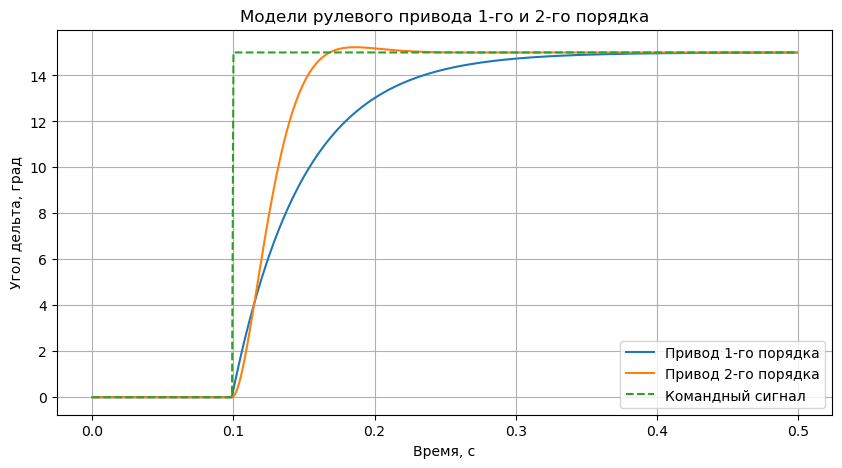

In [23]:
plt.figure(figsize=(10,5))
plt.plot(t_arr, np.rad2deg(delta1_arr), label='Привод 1-го порядка')
plt.plot(t_arr, np.rad2deg(delta2_arr), label='Привод 2-го порядка')
plt.plot(t_arr, [np.rad2deg(delta_cmd(t)) for t in t_arr], '--', label='Командный сигнал')
plt.xlabel('Время, с')
plt.ylabel('Угол дельта, град')

plt.title('Модели рулевого привода 1-го и 2-го порядка')
plt.grid(True)
plt.legend()
plt.show()